##### 问题描述

大家好，我们在用 networkx 显示中文的时候，会发现不能显示中文。 

##### 解决办法

1. 下载Github仓库中的字体SimHei.ttf； 
2. 在 jupyter notebook 中执行
```python
import matplotlib
print(matplotlib.__path__)
```
找到 matplotlib 的路径，然后 cd 到这个路径。 cd 到这个路径之后，继续 cd，cd 到 mpl-data/fonts/ttf 这个路径。 然后把 `DejaVuSans.ttf` 这个文件换成我们刚刚下在的文件。 

```bash
$ mv SimHei.ttf DejaVuSans.ttf
```

其中，用到的 ttf 字体。 我给大家传到附件上了。 

Previous Course

1. What's the language model? OOV problem? 
2. Syntax Tree. lambda 

$$ pr(w) $$

## Out of Vocabulary(OOV)

Pr(w_o) = constant < Pr(w_1)

## Language Model: Smooth

In [1]:
import random

In [5]:
"""adj* => adj* adj | adj null"""

def adj():  return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]

def adj_star_2():
     return random.choice([lambda : '', lambda : adj() + adj_star_2()])()

def adj_star():
    return random.choice(['', ajd() + adj_star()])

In [ ]:
lambda : adj() + adj_star_2()

In [31]:
numbers = [1, -2, -4, 1, 5, 6, 9, -11]

In [36]:
def absolute(number): 
    if number < 0: return -1 * number
    else:
        return number

In [34]:
absolute(-11)

11

In [38]:
mod_5(6)

1

In [39]:
mod_5(7)

2

In [41]:
def mod_5(number): 
    return number % 5

sorted(numbers, key=lambda x: x % 5)

[5, 1, -4, 1, 6, -2, 9, -11]

In [42]:
mod_5_lambda = lambda x: x % 5

In [43]:
mod_5

<function __main__.mod_5(number)>

In [45]:
mod_5_lambda(19)

4

In [46]:
mod_5(19)

4

In [30]:
adj_star_2()

'蓝色的'

## Search Policy

In [48]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [54]:
city_location = {
    '香港': (114.17, 22.28)
}

Input: String -> dict

In [55]:
test_string = "{name:'兰州', geoCoord:[103.73, 36.03]},"

In [56]:
import re

In [86]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [93]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info: continue
    
    # following: we find the city info
    
    city, long, lat = city_info[0]
    
    long, lat = float(long), float(lat)
    
    city_location[city] = (long, lat)

In [94]:
city_location

{'香港': (114.17, 22.28),
 '兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '澳门': (113.54, 22.19)}

In [89]:
import math

In [90]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [91]:
def get_geo_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [95]:
get_geo_distance('上海', '杭州')

153.5185697155768

In [96]:
import networkx as nx

In [114]:
city_graph = nx.Graph()

In [115]:
city_graph.add_nodes_from(list(city_location.keys()))

In [106]:
%matplotlib inline

In [109]:
import matplotlib.pyplot as plt

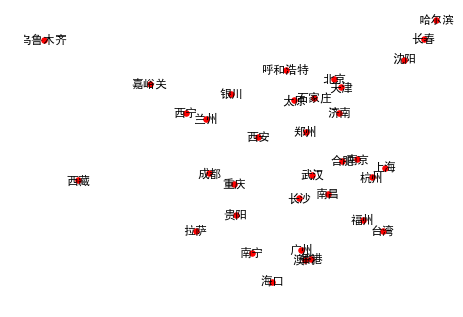

In [120]:
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

In [205]:
threshold = 300

In [208]:
city_connection = defaultdict(list)

In [211]:
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: continue
        
        distance = get_geo_distance(c1, c2)
        
        if distance < threshold:
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)

In [212]:
city_connection

defaultdict(list,
            {'香港': ['广州',
              '长沙',
              '澳门',
              '广州',
              '长沙',
              '澳门',
              '广州',
              '长沙',
              '澳门',
              '广州',
              '长沙',
              '澳门'],
             '广州': ['香港',
              '香港',
              '长沙',
              '澳门',
              '长沙',
              '澳门',
              '香港',
              '香港',
              '长沙',
              '澳门',
              '长沙',
              '澳门'],
             '长沙': ['香港',
              '武汉',
              '郑州',
              '广州',
              '香港',
              '武汉',
              '郑州',
              '广州',
              '澳门',
              '澳门',
              '香港',
              '武汉',
              '郑州',
              '广州',
              '香港',
              '武汉',
              '郑州',
              '广州',
              '澳门',
              '澳门'],
             '澳门': ['香港',
              '广州',
              '长沙',
              '

In [213]:
city_with_road = nx.Graph(city_connection)

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


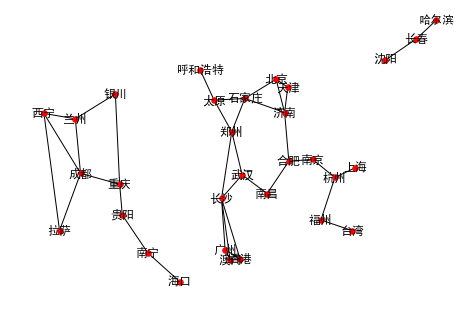

In [214]:
nx.draw(city_with_road, city_location, with_labels=True, node_size=30)

In [ ]:
g

In [147]:
from collections import defaultdict

In [148]:
simple_connection_info_src = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

In [149]:
simple_connection_info = defaultdict(list)

In [150]:
simple_connection_info.update(simple_connection_info_src)

In [198]:
def bfs(graph, start):
    """
    breath first search
    """
    visited = [start]
    
    seen = set()
    
    while visited:
        froninter = visited.pop() #
        
        if froninter in seen: continue
        
        for successor in graph[froninter]:
            if successor in seen: continue
            print(successor)
            
            #visited = visited + [successor] # 我们每次扩展都扩展最新发现的点 -> depth first
            visited = [successor] + visited # 我们每次扩展都先考虑已经发现的 老的点 -> breath first
            
            # 所以说，这个扩展顺序其实是决定了我们的深度优先还是广度优先
    
        seen.add(froninter)
    
    return seen

In [202]:
number_grpah = defaultdict(list)

number_grpah.update({
    1: [2, 3],
    2: [1, 4], 
    3: [1, 5],
    4: [2, 6], 
    5: [3, 7],
    7: [5, 8]
})

In [203]:
bfs(number_grpah, 1)

2
3
4
5
6
7
8


{1, 2, 3, 4, 5, 6, 7, 8}

In [201]:
simple_connection_info['西安']

['兰州', '长沙']

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


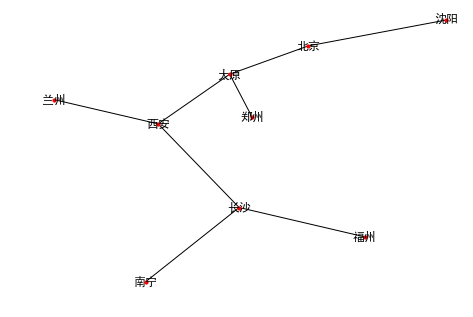

In [128]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True, node_size=10)

In [253]:
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visitied.add(froninter)
        
        pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制

In [243]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

In [250]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [246]:
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for station in path[:-1]:
            distance += get_geo_distance(station, path[-1])
            
        return distance

    return sorted(pathes, key=get_path_distnace)

In [237]:
search('兰州', '福州', simple_connection_info, sort_candidate=shortest_path_first)

['兰州', '西安', '长沙', '福州']

In [142]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [204]:
pretty_print(search('北京', '福州', simple_connection_info))

北京🚗->太原🚗->西安🚗->长沙🚗->福州


## Breath first search

## Depth first search

In [216]:
pretty_print(search('北京', '南京', city_connection))

北京🚗->济南🚗->合肥🚗->南京


In [217]:
pretty_print(search('北京', '长沙', city_connection))

北京🚗->石家庄🚗->郑州🚗->长沙


In [249]:
pretty_print(search('北京', '广州', city_connection, sort_candidate=transfer_stations_first))

北京🚗->石家庄🚗->郑州🚗->长沙🚗->广州


In [251]:
pretty_print(search('北京', '广州', city_connection, sort_candidate=transfer_as_much_possible))

北京🚗->石家庄🚗->郑州🚗->武汉🚗->长沙🚗->广州


## Assignment

1. 网络爬虫 + 正则
2. 数据处理
3. 算法的应用能力

In [254]:
import requests

In [255]:
url = 'https://movie.douban.com/subject/26931786/?from=showing'

In [257]:
response = requests.get(url)

In [270]:
what_we_want = r'<a href="https://(movie\.douban\.com/subject/\d+/\?from=subject-page)" class="" '

In [271]:
pattern = re.compile(what_we_want)

In [272]:
likes = pattern.findall(response.text)

In [273]:
for like in likes:
    print(like)

movie.douban.com/subject/24753477/?from=subject-page
movie.douban.com/subject/26100958/?from=subject-page
movie.douban.com/subject/25820460/?from=subject-page
movie.douban.com/subject/1432146/?from=subject-page
movie.douban.com/subject/25937854/?from=subject-page
movie.douban.com/subject/1866473/?from=subject-page
movie.douban.com/subject/25821634/?from=subject-page
movie.douban.com/subject/26213252/?from=subject-page
movie.douban.com/subject/25828589/?from=subject-page
movie.douban.com/subject/4920389/?from=subject-page


## Machine Learning

In [274]:
from sklearn.datasets import load_boston

In [275]:
data = load_boston()

In [278]:
X, y = data['data'], data['target']

In [290]:
X[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [291]:
y[1]

21.6

In [293]:
len(X[:, 0])

506

In [294]:
len(y)

506

In [295]:
%matplotlib inline

In [299]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

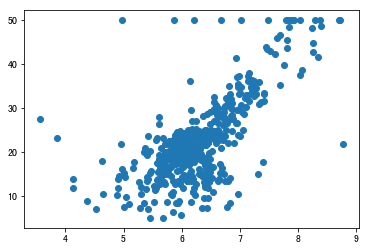

In [300]:
draw_rm_and_price()

In [301]:
import random

In [302]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  

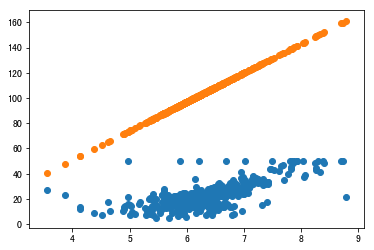

In [343]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

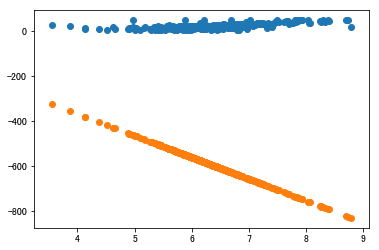

In [344]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

$$ \hat{y} $$

In [347]:
list(y)

[24.0,
 21.6,
 34.7,
 33.4,
 36.2,
 28.7,
 22.9,
 27.1,
 16.5,
 18.9,
 15.0,
 18.9,
 21.7,
 20.4,
 18.2,
 19.9,
 23.1,
 17.5,
 20.2,
 18.2,
 13.6,
 19.6,
 15.2,
 14.5,
 15.6,
 13.9,
 16.6,
 14.8,
 18.4,
 21.0,
 12.7,
 14.5,
 13.2,
 13.1,
 13.5,
 18.9,
 20.0,
 21.0,
 24.7,
 30.8,
 34.9,
 26.6,
 25.3,
 24.7,
 21.2,
 19.3,
 20.0,
 16.6,
 14.4,
 19.4,
 19.7,
 20.5,
 25.0,
 23.4,
 18.9,
 35.4,
 24.7,
 31.6,
 23.3,
 19.6,
 18.7,
 16.0,
 22.2,
 25.0,
 33.0,
 23.5,
 19.4,
 22.0,
 17.4,
 20.9,
 24.2,
 21.7,
 22.8,
 23.4,
 24.1,
 21.4,
 20.0,
 20.8,
 21.2,
 20.3,
 28.0,
 23.9,
 24.8,
 22.9,
 23.9,
 26.6,
 22.5,
 22.2,
 23.6,
 28.7,
 22.6,
 22.0,
 22.9,
 25.0,
 20.6,
 28.4,
 21.4,
 38.7,
 43.8,
 33.2,
 27.5,
 26.5,
 18.6,
 19.3,
 20.1,
 19.5,
 19.5,
 20.4,
 19.8,
 19.4,
 21.7,
 22.8,
 18.8,
 18.7,
 18.5,
 18.3,
 21.2,
 19.2,
 20.4,
 19.3,
 22.0,
 20.3,
 20.5,
 17.3,
 18.8,
 21.4,
 15.7,
 16.2,
 18.0,
 14.3,
 19.2,
 19.6,
 23.0,
 18.4,
 15.6,
 18.1,
 17.4,
 17.1,
 13.3,
 17.8,
 14.0,
 14.4,
 13.4,

In [346]:
price_by_random_k_and_b

[-617.775,
 -602.837,
 -676.9449999999999,
 -658.806,
 -673.259,
 -603.7099999999999,
 -563.164,
 -578.684,
 -526.207,
 -562.3879999999999,
 -598.569,
 -562.873,
 -551.2330000000001,
 -557.053,
 -571.312,
 -545.8979999999999,
 -555.6949999999999,
 -561.03,
 -509.2320000000001,
 -535.519,
 -520.2900000000001,
 -558.605,
 -575.774,
 -543.861,
 -554.628,
 -523.1030000000001,
 -543.861,
 -566.559,
 -610.015,
 -627.378,
 -534.1610000000001,
 -568.984,
 -557.15,
 -532.997,
 -571.312,
 -555.501,
 -546.577,
 -547.4499999999999,
 -558.702,
 -619.715,
 -661.328,
 -636.6899999999999,
 -578.3929999999999,
 -582.467,
 -568.693,
 -531.154,
 -541.242,
 -564.91,
 -503.703,
 -523.394,
 -558.4110000000001,
 -573.155,
 -611.567,
 -561.806,
 -551.136,
 -683.153,
 -599.151,
 -641.1519999999999,
 -576.0649999999999,
 -554.919,
 -536.877,
 -558.702,
 -606.2320000000001,
 -635.914,
 -669.088,
 -590.13,
 -541.3389999999999,
 -550.166,
 -522.618,
 -550.845,
 -602.449,
 -558.217,
 -568.3050000000001,
 -585.765,


In [ ]:
[1, 1, 1]
[2, 2, 2]

## loss

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}$$

In [354]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

## First-Method: Random generation: get best k and best b

In [359]:
X_rm = X[:, 5]

-1494.2815093865156

In [397]:
trying_times = 2000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 22.830921358177008 best_b: -39.106693780646864, and the loss is: 6834.9849816249225
When time is : 8, get best_k: -0.13476310615925513 best_b: 66.10942821293781, and the loss is: 1911.4631954298295
When time is : 18, get best_k: 13.434016957539342 best_b: -26.659454929889108, and the loss is: 1294.395363693378
When time is : 26, get best_k: -11.595232591052124 best_b: 97.74977573713909, and the loss is: 260.1611343517222
When time is : 39, get best_k: 7.493737984263177 best_b: -14.863303599837138, and the loss is: 138.9513784030379
When time is : 50, get best_k: 8.3201395250247 best_b: -22.18885279232377, and the loss is: 101.16700044132911
When time is : 317, get best_k: 2.373654340444631 best_b: 2.501547771792829, and the loss is: 92.05591808972756
When time is : 552, get best_k: 2.7375669767659474 best_b: 2.0764427508479315, and the loss is: 74.1322686397549
When time is : 747, get best_k: 13.139669300610606 best_b: -63.57408783325027, and the loss is: 

In [386]:
10 ** 0.5

3.1622776601683795

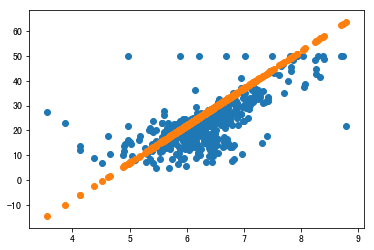

In [362]:
X_rm = X[:, 5]
k = 15
b = -68
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## 2nd-Method: Direction Adjusting

In [403]:
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.1

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 0, get best_k: 53.738304261370835 best_b: -19.30049026971576, and the loss is: 88577.49372297213
When time is : 1, get best_k: 53.638304261370834 best_b: -19.200490269715758, and the loss is: 88260.64299266017
When time is : 2, get best_k: 53.53830426137083 best_b: -19.100490269715756, and the loss is: 87944.36066346469
When time is : 3, get best_k: 53.43830426137083 best_b: -19.000490269715755, and the loss is: 87628.64673538563
When time is : 4, get best_k: 53.33830426137083 best_b: -18.900490269715753, and the loss is: 87313.50120842305
When time is : 5, get best_k: 53.23830426137083 best_b: -18.800490269715752, and the loss is: 86998.92408257713
When time is : 6, get best_k: 53.13830426137083 best_b: -18.70049026971575, and the loss is: 86684.91535784744
When time is : 7, get best_k: 53.038304261370826 best_b: -18.60049026971575, and the loss is: 86371.47503423445
When time is : 8, get best_k: 52.938304261370824 best_b: -18.500490269715748, and the loss is: 86058.603

When time is : 355, get best_k: 18.23830426137033 best_b: 16.19950973028421, and the loss is: 11810.96861638048
When time is : 356, get best_k: 18.13830426137033 best_b: 16.29950973028421, and the loss is: 11695.900282419701
When time is : 357, get best_k: 18.038304261370328 best_b: 16.399509730284212, and the loss is: 11581.40034957538
When time is : 358, get best_k: 17.938304261370327 best_b: 16.499509730284213, and the loss is: 11467.468817847575
When time is : 359, get best_k: 17.838304261370325 best_b: 16.599509730284215, and the loss is: 11354.105687236235
When time is : 360, get best_k: 17.738304261370324 best_b: 16.699509730284216, and the loss is: 11241.31095774137
When time is : 361, get best_k: 17.638304261370322 best_b: 16.799509730284218, and the loss is: 11129.084629363006
When time is : 362, get best_k: 17.53830426137032 best_b: 16.89950973028422, and the loss is: 11017.426702101115
When time is : 363, get best_k: 17.43830426137032 best_b: 16.99950973028422, and the loss

如果我们想得到更快的更新，在更短的时间内获得更好的结果，我们需要一件事情：

#### 找对改变的方向

#### 如何找对改变的方向呢？ 

#### 2nd-method: 监督让他变化--> 监督学习

## 导数

In [357]:
loss([1, 1, 1], [2, 2, 3])

2.0

In [358]:
loss([1, 1, 1], [1, 1, 1])

0.0

In [289]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [284]:
data['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000